In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

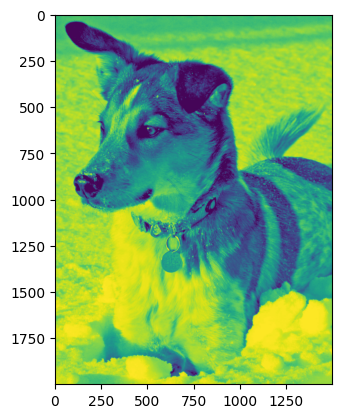

U shape: (2000, 1500)
S shape: (1500,)
Vt shape: (1500, 1500)
Rank 2: I_r error = 1.02e-15
Rank 2: I_n error = 4.47e+01
Rank 100: I_r error = 7.98e-15
Rank 100: I_n error = 4.36e+01
Rank 200: I_r error = 9.35e-15
Rank 200: I_n error = 4.24e+01
Rank 400: I_r error = 1.28e-14
Rank 400: I_n error = 4.00e+01
Rank 600: I_r error = 1.52e-14
Rank 600: I_n error = 3.74e+01
Rank 800: I_r error = 1.81e-14
Rank 800: I_n error = 3.46e+01
Rank 1000: I_r error = 2.00e-14
Rank 1000: I_n error = 3.16e+01
Rank 1500: I_r error = 2.64e-14
Rank 1500: I_n error = 2.24e+01


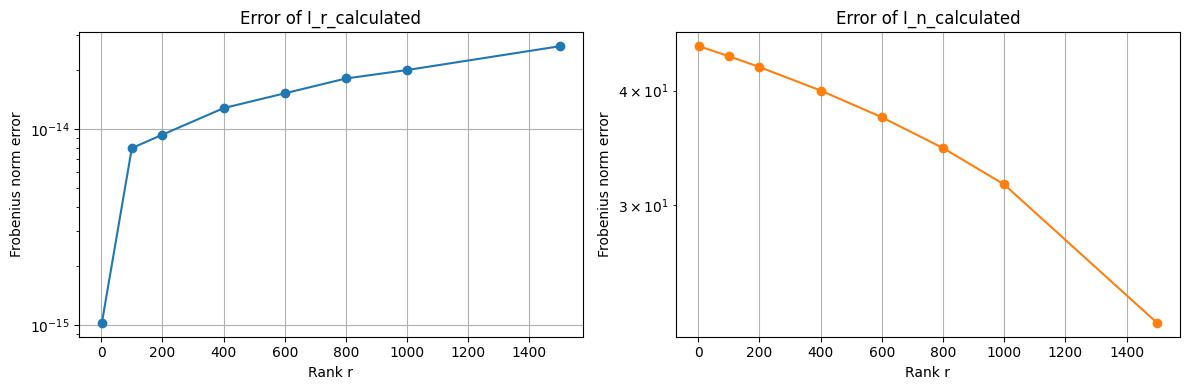

In [18]:
A = imread('../DATA/dog.jpg')
X = np.mean(A, -1)  # Convert to grayscale by averaging color channels
img = plt.imshow(X)
plt.show()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vt shape: {Vt.shape}')

S = np.diag(S)
ranks = [2, 100, 200, 400, 600, 800,1000, 1500]
I_r_errs = []
I_n_errs = []

for r in ranks:
    Xr = U[:, :r] @ S[:r, :r] @ Vt[:r, :]
    I_r = U[:, :r].T @ U[:, :r]
    I_ideal = np.eye(r)
    I_ideal[I_ideal < 1e-5] = 0  # Set very small values to zero for cleaner output
    I_r[I_r < 1e-5] = 0  # Set very small values to zero for cleaner output
    I_r_err = np.linalg.norm(I_r - I_ideal, 'fro')
    print(f'Rank {r}: I_r error = {I_r_err:.2e}')
    I_r_errs.append(I_r_err)

    I_n = U[:, :r] @ U[:, :r].T
    I_n_err = np.linalg.norm(I_n - np.eye(U.shape[0]), 'fro')
    print(f'Rank {r}: I_n error = {I_n_err:.2e}')
    I_n_errs.append(I_n_err)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax1.semilogy(ranks, I_r_errs, 'o-')
ax1.set_xlabel('Rank r')
ax1.set_ylabel('Frobenius norm error')
ax1.set_title('Error of I_r_calculated')
ax1.grid()

ax2.semilogy(ranks, I_n_errs, 'o-', color='tab:orange')
ax2.set_xlabel('Rank r')
ax2.set_ylabel('Frobenius norm error')
ax2.set_title('Error of I_n_calculated')
ax2.grid()

plt.tight_layout()
plt.show()